# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Noted Trends:
    1) Temperatures are hotter closer to the equator
    2) Windspeeds seem to have no relationship with distance to the equator and may be affected          mostly by other factors as the charts show one-offs here and there.
    3) Cloudiness does seem to have an increasing trend in the Southern Hemisphere as distance          from the equator increases
   
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ea42d8bcdf893e1182ba8d161cdea8c5&units=imperial&q=


In [4]:
# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

# Get the city data from the weather_json to preview format
content = json.dumps(weather_json, indent = 4, sort_keys=True)
print(content)

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 60.73,
        "lon": 77.59
    },
    "dt": 1592380940,
    "id": 1490796,
    "main": {
        "feels_like": 68.22,
        "humidity": 44,
        "pressure": 998,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Strezhevoy",
    "sys": {
        "country": "RU",
        "id": 8986,
        "sunrise": 1592342196,
        "sunset": 1592411077,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 13.42
    }
}


In [4]:
print("Beginning Data Retrieval")
print("---------------------------------")

# Set counts for city number and set of 50 cities each
record_count = 0
set_count = 1

# Lists for holding cities temperature, latitude, humidity, cloudiness, wind speed (mph), etc.
city_name = []
long = []
lat = []
temp = []
hum = []
wind_speed = []
cloud = []
max_temp = []
country = []
date = []


# Loop through cities to obtain weather data and print log of each city as it'sbeing processed (with the city number and city name).
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record_count} of Set {set_count} | {city} ")
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all']) 
        max_temp.append(response['main']['temp_max'])  
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        
    except: 
        print('City not found.  Skipping...')
    
    record_count += 1
    if record_count == 51:
        record_count = 0
        set_count += 1
    

Beginning Data Retrieval
---------------------------------
Processing Record 0 of Set 1 | paine 
Processing Record 1 of Set 1 | tsihombe 
City not found.  Skipping...
Processing Record 2 of Set 1 | port hedland 
Processing Record 3 of Set 1 | goodlettsville 
Processing Record 4 of Set 1 | bira 
Processing Record 5 of Set 1 | bluff 
Processing Record 6 of Set 1 | busselton 
Processing Record 7 of Set 1 | kalmunai 
Processing Record 8 of Set 1 | klaksvik 
Processing Record 9 of Set 1 | dindori 
Processing Record 10 of Set 1 | antalaha 
Processing Record 11 of Set 1 | mataura 
Processing Record 12 of Set 1 | pangody 
Processing Record 13 of Set 1 | port lincoln 
Processing Record 14 of Set 1 | talnakh 
Processing Record 15 of Set 1 | bredasdorp 
Processing Record 16 of Set 1 | punta arenas 
Processing Record 17 of Set 1 | freeport 
Processing Record 18 of Set 1 | bouna 
Processing Record 19 of Set 1 | carballo 
Processing Record 20 of Set 1 | pacific grove 
Processing Record 21 of Set 1 |

Processing Record 29 of Set 4 | hasaki 
Processing Record 30 of Set 4 | airai 
Processing Record 31 of Set 4 | brinkovskaya 
Processing Record 32 of Set 4 | tapejara 
Processing Record 33 of Set 4 | tambun 
Processing Record 34 of Set 4 | iqaluit 
Processing Record 35 of Set 4 | bisho 
Processing Record 36 of Set 4 | san cristobal 
Processing Record 37 of Set 4 | antofagasta 
Processing Record 38 of Set 4 | sorland 
Processing Record 39 of Set 4 | suluq 
Processing Record 40 of Set 4 | ahar 
Processing Record 41 of Set 4 | nguiu 
City not found.  Skipping...
Processing Record 42 of Set 4 | eydhafushi 
Processing Record 43 of Set 4 | aklavik 
Processing Record 44 of Set 4 | faanui 
Processing Record 45 of Set 4 | marcona 
City not found.  Skipping...
Processing Record 46 of Set 4 | marsa matruh 
Processing Record 47 of Set 4 | luganville 
Processing Record 48 of Set 4 | jacareacanga 
Processing Record 49 of Set 4 | nanortalik 
Processing Record 50 of Set 4 | tasiilaq 
Processing Record 

Processing Record 6 of Set 8 | ponta delgada 
Processing Record 7 of Set 8 | kazachinskoye 
Processing Record 8 of Set 8 | arlit 
Processing Record 9 of Set 8 | acari 
Processing Record 10 of Set 8 | eskisehir 
Processing Record 11 of Set 8 | grand gaube 
Processing Record 12 of Set 8 | lasa 
Processing Record 13 of Set 8 | vihti 
Processing Record 14 of Set 8 | pagman 
City not found.  Skipping...
Processing Record 15 of Set 8 | santa marinella 
Processing Record 16 of Set 8 | benghazi 
Processing Record 17 of Set 8 | gazanjyk 
Processing Record 18 of Set 8 | hofn 
Processing Record 19 of Set 8 | kiama 
Processing Record 20 of Set 8 | umm lajj 
Processing Record 21 of Set 8 | port hardy 
Processing Record 22 of Set 8 | presidencia roque saenz pena 
Processing Record 23 of Set 8 | jardim 
Processing Record 24 of Set 8 | paamiut 
Processing Record 25 of Set 8 | vila franca do campo 
Processing Record 26 of Set 8 | porto santo 
Processing Record 27 of Set 8 | moroni 
Processing Record 28

In [3]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data to DataFrame:
# First, create a dictionary from lists created above
city_dict = {"City":city_name, "Lat":lat, "Lng":long, "Max Temp":max_temp, "Humidity":hum, "Cloudiness":cloud,
           "Wind Speed":wind_speed, "Country":country, "Date":date}
city_dict


{'City': ['Paine',
  'Port Hedland',
  'Goodlettsville',
  'Bira',
  'Bluff',
  'Busselton',
  'Kalmunai',
  'Klaksvík',
  'Dindori',
  'Antalaha',
  'Mataura',
  'Pangody',
  'Port Lincoln',
  'Talnakh',
  'Bredasdorp',
  'Punta Arenas',
  'Freeport',
  'Bouna',
  'Carballo',
  'Pacific Grove',
  'Ushuaia',
  'Longyearbyen',
  'Avera',
  'Soest',
  'Kiruna',
  'Katsuura',
  'Saint-Ambroise',
  'Togur',
  'Kapaa',
  'Vaini',
  'Esperance',
  'Kwang Binh',
  'Ahipara',
  'Caesarea',
  'Ribeira Grande',
  'Wuda',
  'Mar del Plata',
  'Shimokizukuri',
  'Mandalgovi',
  'Matadi',
  'Bathsheba',
  'Jamestown',
  'Quatre Cocos',
  'Rikitea',
  "Severo-Kuril'sk",
  'Daşoguz',
  'Richards Bay',
  'Lorengau',
  'Morondava',
  'Tuktoyaktuk',
  'Nālūt',
  'Yellowknife',
  'Hithadhoo',
  'Carnarvon',
  'Khatanga',
  'Hermanus',
  'Leningradskiy',
  'Itapeva',
  'Huarmey',
  'Hirara',
  'Bethel',
  'Dikson',
  'Batemans Bay',
  'Kushima',
  'Grand-Santi',
  'Abbeville',
  'Sestroretsk',
  'Port Eli

In [9]:
# Convert to Dataframe and export DataFrame to a .csvfile
city_df = pd.DataFrame(city_dict)
city_df.to_csv('output_files/citydata.csv')

In [10]:
city_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [4]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [11]:
# Display the DataFrame
city_df = pd.DataFrame(city_dict)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paine,-33.82,-70.75,46.40,87,75,2.24,CL,1592529966
1,Port Hedland,-20.32,118.57,73.40,64,0,8.05,AU,1592529913
2,Goodlettsville,36.32,-86.71,79.00,53,75,11.41,US,1592529967
3,Bira,49.00,132.47,65.14,65,87,1.16,RU,1592529967
4,Bluff,-46.60,168.33,46.92,69,0,11.32,NZ,1592529779


In [5]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Sort values by humidity to determine if any > 100%
city_df.sort_values('Humidity', ascending = False).head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
447,Huai Yot,7.79,99.63,77.0,100,40,4.70,TH,1592529881
371,Sandwick,60.00,-1.25,51.8,100,86,14.99,GB,1592530041
166,Hasaki,35.73,140.83,66.2,100,75,12.75,JP,1592529969
431,Racoviţa,45.70,21.64,63.0,100,44,5.82,RO,1592530052
30,Esperance,-33.87,121.90,51.8,100,40,11.41,AU,1592529926


In [ ]:
# Drop cities where humidity is > 100%

In [81]:
#  Get the indices of cities that have humidity over 100%.

In [7]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

Int64Index([], dtype='int64')

In [13]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paine,-33.82,-70.75,46.40,87,75,2.24,CL,1592529966
1,Port Hedland,-20.32,118.57,73.40,64,0,8.05,AU,1592529913
2,Goodlettsville,36.32,-86.71,79.00,53,75,11.41,US,1592529967
3,Bira,49.00,132.47,65.14,65,87,1.16,RU,1592529967
4,Bluff,-46.60,168.33,46.92,69,0,11.32,NZ,1592529779


In [14]:
# Review data statistics to determine if any outliers based on humidity value
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.095051,17.018669,67.311485,70.552901,48.568259,8.098942,1.592530e+09
std,33.562824,89.172135,13.717345,21.083994,40.828299,5.540009,8.441998e+01
min,-54.800000,-179.170000,31.690000,5.000000,0.000000,0.340000,1.592530e+09
25%,-8.882500,-58.717500,57.730000,61.250000,1.000000,4.245000,1.592530e+09
50%,25.140000,21.665000,68.630000,74.500000,47.000000,6.810000,1.592530e+09
75%,47.900000,93.407500,78.197500,87.000000,90.000000,11.002500,1.592530e+09
max,78.220000,178.420000,99.280000,100.000000,100.000000,40.260000,1.592530e+09


In [15]:
city_df['Humidity'].median()

74.5

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.sort_index(inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paine,-33.82,-70.75,46.40,87,75,2.24,CL,1592529966
1,Port Hedland,-20.32,118.57,73.40,64,0,8.05,AU,1592529913
2,Goodlettsville,36.32,-86.71,79.00,53,75,11.41,US,1592529967
3,Bira,49.00,132.47,65.14,65,87,1.16,RU,1592529967
4,Bluff,-46.60,168.33,46.92,69,0,11.32,NZ,1592529779


In [8]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

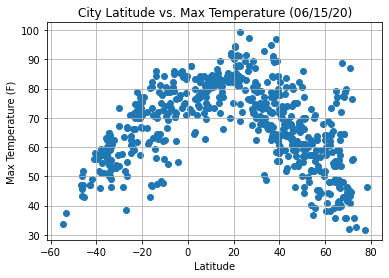

In [17]:
# Create a scatter plot latitude vs Temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title("City Latitude vs. Max Temperature (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_files/LatTemp.png")
plt.show()

Observation: It appears the temperature is higher when closer to the equator

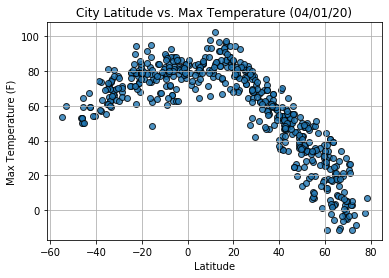

In [10]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

## Latitude vs. Humidity Plot

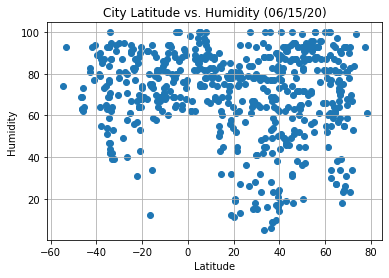

In [18]:
# Create a scatter plot latitude vs Humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title("City Latitude vs. Humidity (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_files/LatHum.png")
plt.show()

Observation:  Humidity level seems to be higher away from the equator in either direction

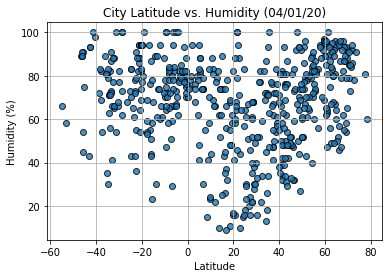

In [11]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

## Latitude vs. Cloudiness Plot

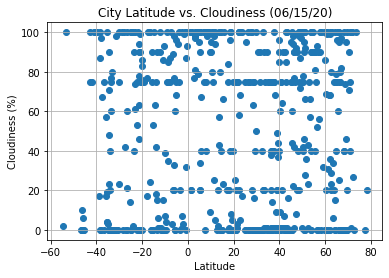

In [19]:
# Create a scatter plot latitude vs Cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title("City Latitude vs. Cloudiness (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_files/LatCloud.png")
plt.show()

Observation:  It appears that cloudiness is either concentrated at higher or lower levels regardless of the latitude.

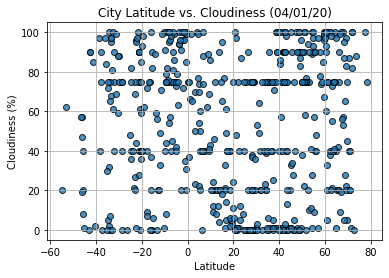

In [12]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

## Latitude vs. Wind Speed Plot

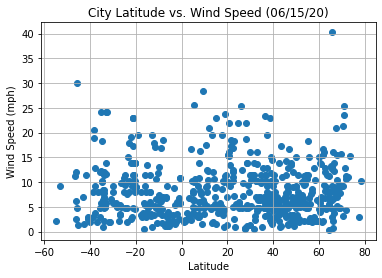

In [20]:
# Create a scatter plot latitude vs Wind Speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title("City Latitude vs. Wind Speed (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_files/LatWind.png")
plt.show()

Observation: Wind speed seems steady at lower speed in general across the board

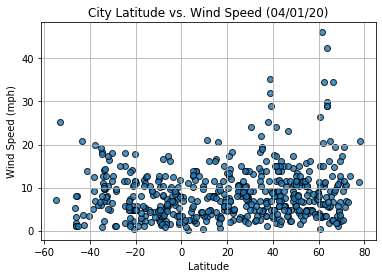

In [13]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = clean_city_data[clean_city_data.Lat < 0]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paine,-33.82,-70.75,46.40,87,75,2.24,CL,1592529966
1,Port Hedland,-20.32,118.57,73.40,64,0,8.05,AU,1592529913
4,Bluff,-46.60,168.33,46.92,69,0,11.32,NZ,1592529779
5,Busselton,-33.65,115.33,48.99,95,77,4.97,AU,1592529906
9,Antalaha,-14.90,50.28,70.70,90,100,13.40,MG,1592529968


In [22]:
northern_df = clean_city_data[clean_city_data.Lat >= 0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Goodlettsville,36.32,-86.71,79.00,53,75,11.41,US,1592529967
3,Bira,49.00,132.47,65.14,65,87,1.16,RU,1592529967
6,Kalmunai,7.42,81.82,81.00,78,0,6.06,LK,1592529968
7,Klaksvík,62.23,-6.59,48.20,100,99,4.70,FO,1592529913
8,Dindori,22.95,81.08,74.80,80,100,7.18,IN,1592529968


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48176920072895574


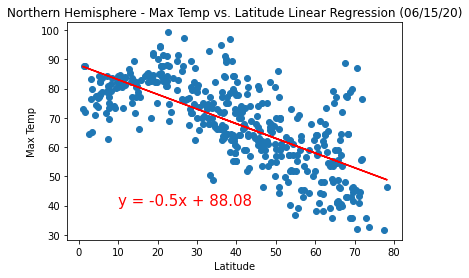

In [24]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/NorthernTempLat.png")
plt.show()

Observation: Temperature seems to decrease as distance from the equator increases

The r-squared is: 0.8271188905041935


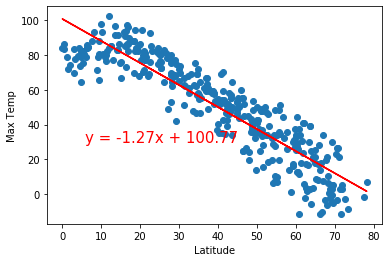

In [16]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5191846227623454


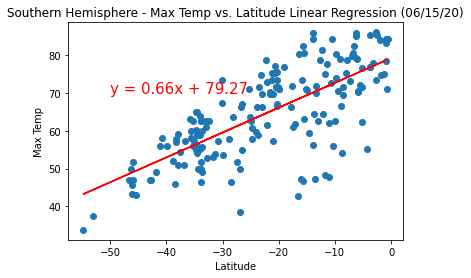

In [27]:
# Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/SouthernTempLat.png")
plt.show()

Observation: Temperature seems to increase as distance from the equator decreases

The r-squared is: 0.39936284758885965


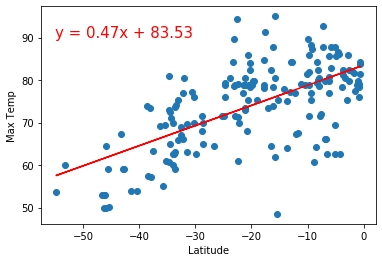

In [17]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002115556983527318


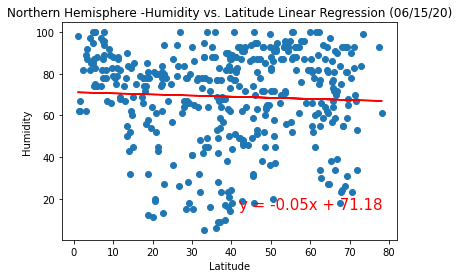

In [28]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,15),fontsize=15,color="red")
plt.title("Northern Hemisphere -Humidity vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/NorthernHumidityLat.png")
plt.show()

Observation: Humidity seems to slightly decrease as distance from the equator increases

The r-squared is: 0.10829462153873139


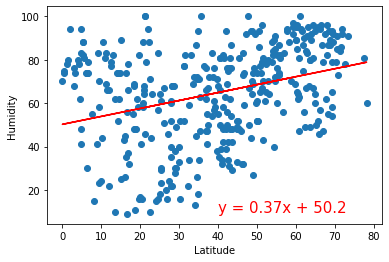

In [18]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016779765489446666


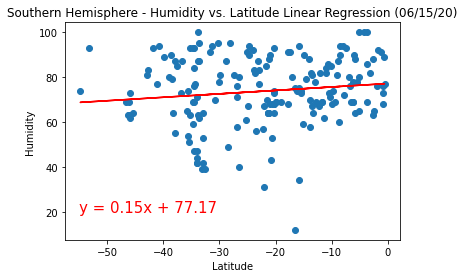

In [29]:
# Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/SouthernHumidityLat.png")
plt.show()

Observation: Humidity seems to slightly increase as distance from the equator decreases

The r-squared is: 0.0008996079328825663


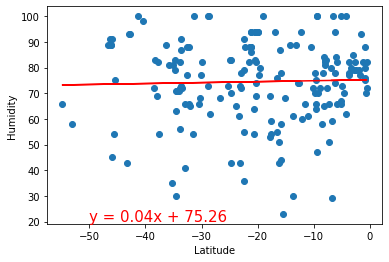

In [19]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004776529698997655


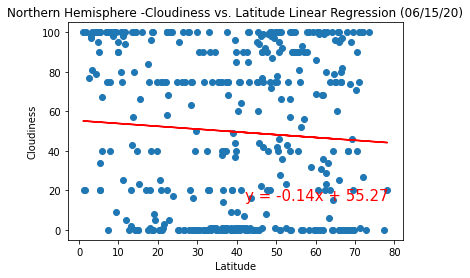

In [30]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,15),fontsize=15,color="red")
plt.title("Northern Hemisphere -Cloudiness vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/NorthernCloudLat.png")
plt.show()

Observation: Cloudiness seems to decrease as distance from the equator increases

The r-squared is: 0.05768812657005063


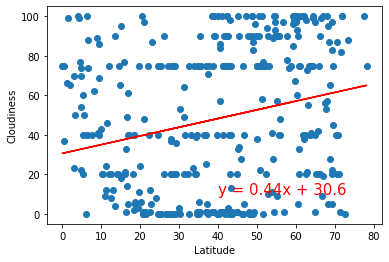

In [20]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01951747074172396


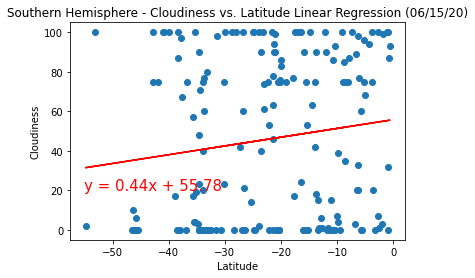

In [31]:
# Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/SouthernCloudLat.png")
plt.show()

Observation: Cloudiness seems to increase as distance from the equator decreases

The r-squared is: 0.0684912094859049


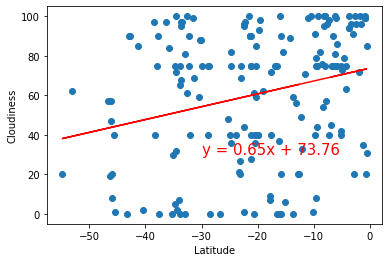

In [21]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00040188420886547274


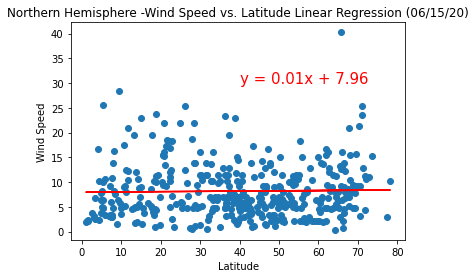

In [33]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title("Northern Hemisphere -Wind Speed vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/NorthernWindLat.png")
plt.show()

Observation: There seems to be no variation in wind relevant to latitude

The r-squared is: 0.023371104533850804


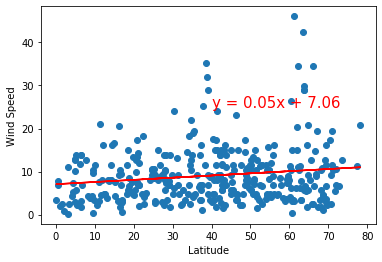

In [22]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02949402747699125


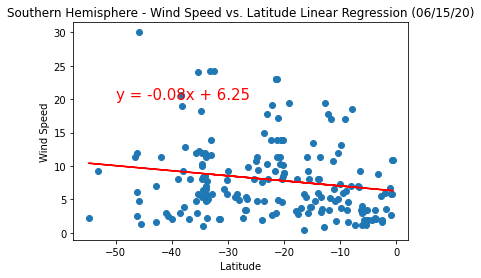

In [34]:
# Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (06/15/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_files/SouthernWindLat.png")
plt.show()

Observation: Wind speed seems to decrease as distance is closer to the equator

The r-squared is: 0.03381889207758188


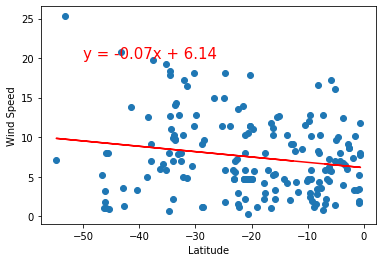

In [23]:
# DO NOT RUN OR DELETE CELL - SAMPLE RESPONSE